In [2]:
import sympy as sp
import einsteinpy.symbolic as gr
sp.init_printing()

In [1]:
t, r, th, ph = sp.symbols('t, r, theta, phi')
u, a, c = sp.symbols('mu, a, c')
rhox, Dx, Ex = sp.symbols('rho, Delta, Sigma')

rho_sq = r**2 + a**2*(sp.cos(th))**2
D = r**2 - 2*u*r + a**2
E_sq = (r**2 + a**2)**2 - a**2*D*(sp.sin(th))**2

n = 4

NameError: name 'sp' is not defined

## Métrica

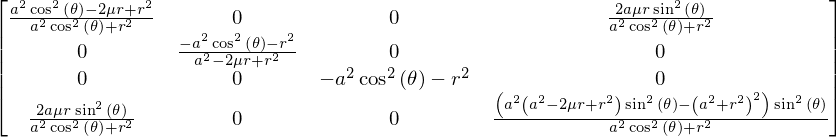

In [4]:
metric = [[0 for i in range(4)] for i in range(4)]

metric[0][0] = sp.simplify((D - a**2*(sp.sin(th))**2)/rho_sq)
metric[0][3] = sp.simplify(2*u*a*r*(sp.sin(th))**2/rho_sq)
metric[1][1] = -rho_sq/D
metric[2][2] = -rho_sq
metric[3][0] = sp.simplify(2*u*a*r*(sp.sin(th))**2/rho_sq)
metric[3][3] = sp.simplify(-E_sq*(sp.sin(th))**2/rho_sq)

coord = [t, r, th, ph]
metric_gr = gr.MetricTensor(metric, coord)

metric_gr.tensor()

In [5]:
def subsx(exp, extra = False):
    exp = exp.simplify() 
    exp = sp.factor(exp)
    exp = exp.subs(Ex**2*(Dx - a**2*(sp.sin(th))**2) + 4*a**2*u**2*r**2*(sp.sin(th))**2, Dx*rhox**4)
    exp = exp.subs(Dx*Ex**2 - Ex**2*a**2*(sp.sin(th))**2 + 4*a**2*u**2*r**2*(sp.sin(th))**2, Dx*rhox**4)
    exp = exp.subs(2*Dx*Ex**2 - Ex**2*a**2*(sp.sin(th))**2 + 4*a**2*u**2*r**2*(sp.sin(th))**2, Dx*(rhox**4 + Ex**2))
    exp = exp.subs(3*Dx*Ex**2 - Ex**2*a**2*(sp.sin(th))**2 + 4*a**2*u**2*r**2*(sp.sin(th))**2, Dx*(rhox**4 + 2*Ex**2))
    #exp = exp.subs(a**2*(sp.sin(th))**2, rho**2 + 2*u*r - D**2)
    return exp

In [ ]:
metricx = subsx(metric_gr)

metricx.tensor()

In [ ]:
g_latex = open('metrica.txt', 'w')

for i in range(n):
    for j in range(i, n):
        if metricx[i, j] != 0:
            g_latex.write(str(i) + str(j) + '\n')
            g_latex.write(sp.latex(metricx[i, j]) + '\n')

g_latex.close()

## Métrica inversa $g^{\mu \nu}$

In [ ]:
inv = metric_gr.inv()

In [ ]:
invx = subsx(inv)

invx.tensor()

## Christoffel

In [ ]:
chris = gr.ChristoffelSymbols.from_metric(metric_gr)

In [1]:
chrx = subsx(chris)

chr_latex = open('christoffel.txt', 'w')

for i in range(n):
    for j in range(n):
        for k in range(j, n):
            if chrx[i, j, k] != 0:
                chrxpr = sp.simplify(chrx[i, j, k])
                #chrxpr = chrxpr.subs(rho**2 - 2*u*r, D - a**2*(sp.sin(th))**2)
                chrxpr = chrxpr.ratsimp().cancel().factor().trigsimp()
                chrxpx = sp.collect(chrxpr, (sp.sin(th))**2)
                
                chr_latex.write(str(i) + str(j) + str(k) + '\n')
                chr_latex.write(sp.latex(chrxpr) + '\n')
                
                display([i, j, k], chrxpr)
                
chr_latex.close()

NameError: name 'subsx' is not defined

# Riemann

In [ ]:
#rie = gr.RiemannCurvatureTensor.from_christoffels(chris)

In [ ]:
for i in range(n):
    for j in range(n):
        for k in range(n):
            if j != k:
                if rie[i, j, k] != 0:
                    riex = sp.simplify(chris[i, j, k].subs([(r**2 + a**2*(sp.cos(theta))**2, rhox), (r**2 - 2*u*r + a**2, Dx)]))
                    riex = chrisx.subs((r**2 + a**2)**2 - a**2*Dx*(sp.sin(theta))**2, Ex)
                    #chrisx = 
                    riex = chrisx.ratsimp().cancel()
                    riex = chrisx.factor()

                    display([i, j, k], riex)

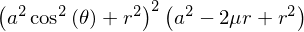

In [8]:
subsx(sp.factor(E_sq*D - a**2*(E_sq - 4*u**2*r**2)*(sp.sin(th))**2))

In [19]:
subsx(sp.simplify(D*E_sq - 2*D*a**2*u**2*(sp.sin(th))**2 - 2*E_sq*a**2*(sp.sin(th))**2 + E_sq*a**2 + 8*a**2*u**2*r**2*(sp.sin(th))**2 - 4*a**2*u**2*r**2))

In [47]:
exp1 = subsx(-2*D*a**2*u**2 - 2*E_sq*a**2 + 8*a**2*u**2*r**2)
exp1 = exp1.subs(a**2 - 2*u*r + r**2, Dx)
exp1 = exp1.subs(r**2 + a**2 - a**2*(sp.sin(th))**2, rhox**2 )

exp1

In [38]:
sp.simplify(sp.expand(-E_sq + 4*u*r))

In [61]:
exp2 = sp.simplify(sp.trigsimp(-a**2*E_sq + 2*D*a**2*(u**2 + 2*u*r + rho_sq)*(sp.sin(th))**2 + 4*a**2*u**2*r**2))
exp2 = exp2.subs(a**2 - 2*u*r + r**2, Dx)
exp2 = exp2.subs(r**2 + a**2 - a**2*(sp.sin(th))**2, rhox**2)
exp2 = exp2.subs(a**2 + r**2, D + 2*u*r)



exp2

In [62]:
exp3 = subsx(-2*D*a**2*u**2 - 2*E_sq*a**2 + 8*a**2*u**2*r**2)
exp3 = exp1.subs(a**2 - 2*u*r + r**2, Dx)
exp3 = exp1.subs(r**2 + a**2 - a**2*(sp.sin(th))**2, rhox**2 )

exp3

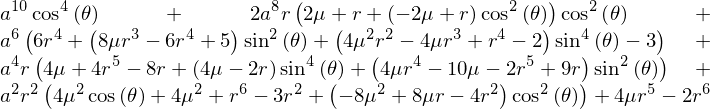

In [18]:
exp = sp.trigsimp(sp.collect(sp.simplify(sp.expand(-2*D*E_sq - E_sq*a**2*sp.cos(2*th) + E_sq**2*a**2 + 4*a**2*u**2*r**2*sp.cos(th) - 4*a**2*u**2*r**2)), a))
exp = sp.collect(exp, sp.cos(th))
exp = sp.collect(exp, sp.sin(th))

exp

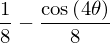

In [13]:
subsx(sp.factor(E_sq*D - a**2*(E_sq - 4*u**2*r**2)*(sp.sin(th))**2))